In [2]:
#Pandas uses C++, so try to do as much as possible in pandas, rather than doing in python
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from textblob import TextBlob
import nltk
from wordcloud import WordCloud
from nltk.corpus import stopwords

In [3]:
# Questions to answer?

# Top languages people use
# Top sources of product buying
# Top sources per country
# Top countries by buying product
# Top cellphones bought
# Change of ratings per source with time
# Change of ratings of cellphone with time
# Text Analytics

In [4]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [5]:
Reviews_1 = pd.read_csv("C:/Users/HP/Downloads/14-million-cell-phone-reviews/phone_user_review_file_1.csv", encoding = "ISO-8859-1")
Reviews_2 = pd.read_csv("C:/Users/HP/Downloads/14-million-cell-phone-reviews/phone_user_review_file_2.csv", encoding = "ISO-8859-1")
Reviews_3 = pd.read_csv("C:/Users/HP/Downloads/14-million-cell-phone-reviews/phone_user_review_file_3.csv", encoding = "ISO-8859-1")
Reviews_4 = pd.read_csv("C:/Users/HP/Downloads/14-million-cell-phone-reviews/phone_user_review_file_4.csv", encoding = "ISO-8859-1")
Reviews_5 = pd.read_csv("C:/Users/HP/Downloads/14-million-cell-phone-reviews/phone_user_review_file_5.csv", encoding = "ISO-8859-1")

In [6]:
frames = [Reviews_1, Reviews_2, Reviews_3, Reviews_4, Reviews_5]
Reviews_all = pd.concat(frames)
Reviews_all['cleaned_product'] = Reviews_all['product'].str.replace("[\(\[].*?[\)\]]", "").to_frame()

In [7]:
Reviews_all

,phone_url,date,lang,country,source,domain,score,score_max,extract,author,product,cleaned_product
0,/cellphones/samsung-galaxy-s8/,5/2/2017,en,us,Verizon Wireless,verizonwireless.com,10.0,10.0,As a diehard Samsung fan who has had every Sam...,CarolAnn35,Samsung Galaxy S8,Samsung Galaxy S8
1,/cellphones/samsung-galaxy-s8/,4/28/2017,en,us,Phone Arena,phonearena.com,10.0,10.0,Love the phone. the phone is sleek and smooth ...,james0923,Samsung Galaxy S8,Samsung Galaxy S8
2,/cellphones/samsung-galaxy-s8/,5/4/2017,en,us,Amazon,amazon.com,6.0,10.0,Adequate feel. Nice heft. Processor's still sl...,R. Craig,"Samsung Galaxy S8 (64GB) G950U 5.8"" 4G LTE Unl...","Samsung Galaxy S8 G950U 5.8"" 4G LTE Unlocked"
3,/cellphones/samsung-galaxy-s8/,5/2/2017,en,us,Samsung,samsung.com,9.2,10.0,Never disappointed. One of the reasons I've be...,Buster2020,Samsung Galaxy S8 64GB (AT&T),Samsung Galaxy S8 64GB
4,/cellphones/samsung-galaxy-s8/,5/11/2017,en,us,Verizon Wireless,verizonwireless.com,4.0,10.0,I've now found that i'm in a group of people t...,S Ate Mine,Samsung Galaxy S8,Samsung Galaxy S8
5,/cellphones/samsung-galaxy-s8/,5/10/2017,en,us,Verizon Wireless,verizonwireless.com,10.0,10.0,I am the type of person who never would comple...,BDB76,Samsung Galaxy S8,Samsung Galaxy S8
6,/cellphones/samsung-galaxy-s8/,5/10/2017,en,us,Verizon Wireless,verizonwireless.com,4.0,10.0,The way this Samsung S8 phone operates is more...,KLC30306,Samsung Galaxy S8,Samsung Galaxy S8
7,/cellphones/samsung-galaxy-s8/,5/10/2017,en,us,Verizon Wireless,verizonwireless.com,6.0,10.0,I bought this phone very excited to use it. I ...,Mnhy,Samsung Galaxy S8,Samsung Galaxy S8
8,/cellphones/samsung-galaxy-s8/,5/10/2017,en,us,Verizon Wireless,verizonwireless.com,6.0,10.0,It is an extremely advanced and truly a Smart ...,Mr Alan,Samsung Galaxy S8,Samsung Galaxy S8
9,/cellphones/samsung-galaxy-s8/,5/10/2017,en,us,Verizon Wireless,verizonwireless.com,8.0,10.0,"Great phone with a PHENOMENAL Camera, not all ...",Raven Wolf Song,Samsung Galaxy S8,Samsung Galaxy S8


us    281785
ru    159296
de    145375
in    127581
it    102935
Name: country, dtype: int64

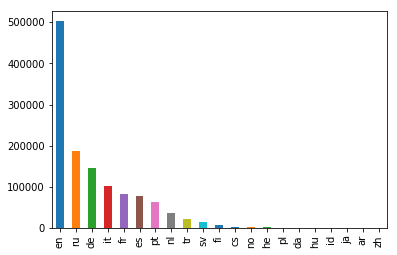

In [8]:
# Top Countries
Reviews_all['country'].value_counts().head()
Reviews_all.lang.value_counts().plot(kind='bar')

In [9]:
# Top sources per country
Reviews_all.groupby(['country','source'])['score'].count()

country  source                       
ae       Souq                                 12
ar       Buscap??                             40
         BuscapÃ©                            156
         MercadoLibre                       7209
au       Bit.au                                5
         Comparison                            7
         DWI                                   0
         Dino Direct                          24
         JB Hi-Fi                            102
         LG                                    0
         MobileZap                            44
         OO.com.au                             1
         Optus                                70
         Target                                1
         The Good Guys                       513
         eBay                                539
be       Centralpoint                        401
         Conrad                               10
         Gadgetzone.nl                         6
         KIESKEURIG           

In [10]:
# Only English Reviews
En_Reviews = Reviews_all[Reviews_all['lang']=='en']

In [11]:
#Regex to keep all text except that within the brackets
En_Reviews['cleaned_product'] = En_Reviews['product'].str.replace("[\(\[].*?[\)\]]", "").to_frame()

In [12]:
# Top products for english reviews
En_Reviews["cleaned_product"].value_counts().head()

Lenovo Vibe K4 Note             9617
OnePlus 3                       7666
Lenovo Vibe K5                  7188
Samsung Galaxy S7 edge 32GB     5856
Samsung Galaxy S7 32GB          5687
Name: cleaned_product, dtype: int64

In [13]:
# Top sources for english reviews
En_Reviews.source.value_counts().head(10)

Amazon              385775
Samsung              37782
Phone Arena          13385
Argos                 5623
Flipkart              5114
Phone Scoop           4506
HandCellPhone         4071
Dooyoo                3929
Verizon Wireless      3767
Ciao                  3764
Name: source, dtype: int64

In [14]:
avg_score_per_device = En_Reviews.groupby(['cleaned_product'])["score"].mean()

In [15]:
df_avg_score_per_device = avg_score_per_device.to_frame()

In [16]:
df_avg_score_per_device = df_avg_score_per_device.reset_index()

In [17]:
#Adding count of each product to the average score dataframe
count_per_device = En_Reviews.groupby(['cleaned_product'])["score"].count()
df_review_count = count_per_device.to_frame()
df_review_count.columns = ['count']
df_review_count = df_review_count.reset_index()

In [18]:
df_review_count_avg_score = df_avg_score_per_device.merge(df_review_count, how='left', left_on=['cleaned_product'], 
                         right_on=['cleaned_product'])

In [19]:
df_review_count_avg_score.sort_values(by='count',ascending=False)

,cleaned_product,score,count
7935,Lenovo Vibe K4 Note,7.177498,9617
11222,OnePlus 3,8.622489,7666
7937,Lenovo Vibe K5,6.781024,7188
14500,Samsung Galaxy S7 edge 32GB,9.380328,5856
14386,Samsung Galaxy S7 32GB,9.353965,5687
14170,Samsung Galaxy S6 32GB,9.188837,4479
14020,Samsung Galaxy S5 16GB,9.130059,4438
11228,OnePlus 3T,8.438171,3631
14365,Samsung Galaxy S6 edge+ 32GB,9.425250,2598
1104,Apple iPhone 5s,7.741359,2575


In [20]:
En_Reviews['extract'].to_frame()
# Work on the text

,extract
0,As a diehard Samsung fan who has had every Sam...
1,Love the phone. the phone is sleek and smooth ...
2,Adequate feel. Nice heft. Processor's still sl...
3,Never disappointed. One of the reasons I've be...
4,I've now found that i'm in a group of people t...
5,I am the type of person who never would comple...
6,The way this Samsung S8 phone operates is more...
7,I bought this phone very excited to use it. I ...
8,It is an extremely advanced and truly a Smart ...
9,"Great phone with a PHENOMENAL Camera, not all ..."


In [21]:
######################### Let's see if the same phone from different sources had similar reviews ###########################

In [22]:
by_product_source = En_Reviews.groupby(['cleaned_product','source'])["score"].mean().to_frame().reset_index()

In [23]:
by_product_source.sort_values(by='cleaned_product')

,cleaned_product,source,score
0,"DOOGEE X5 Max Pro Smartphone, Android 6.0 4G ...",Amazon,7.687500
1,"GT88 5.5"" qHD 1.3GHz MTK6572 2-Core Android 4...",Amazon,8.000000
2,Palm Centro 690 Cell Phone,ReviewStream,NaN
3,Samsung Rocky E1130 Mobile Phone,Amazon,10.000000
4,1661,Phone Scoop,5.857143
5,1680,Phone Scoop,6.750000
6,2014 Newest 4'' ZTE Open C Firefox OS 1.3 Unlo...,Amazon,9.000000
7,2014 Newest CUBOT X6 5.0 Inch HD IPS Screen 3G...,Amazon,8.500000
8,2014 Newest DOOGEE DAGGER DG550 5.5'' Unlocked...,Amazon,7.833333
9,2014 Newest LEAGOO Lead 1 5.5'' Android 4.4 Ki...,Amazon,10.000000


In [24]:
En_Reviews.groupby(['cleaned_product','date'])["score"].mean().to_frame()

score
cleaned_product                                    date                 
 DOOGEE X5 Max Pro Smartphone, Android 6.0 4G S... 8/13/2016    7.687500
 GT88 5.5" qHD 1.3GHz MTK6572 2-Core Android 4.... 11/26/2014   8.000000
 Palm Centro 690 Cell Phone                        10/1/2014         NaN
 Samsung Rocky E1130 Mobile Phone                  11/8/2011   10.000000
1661                                               11/19/2010   5.000000
                                                   5/28/2009    8.000000
                                                   6/11/2009    6.000000
                                                   6/18/2011   10.000000
                                                   6/5/2012     2.000000
                                                   7/31/2009    2.000000
                                                   8/21/2009         NaN
1680                                               1/19/2009    5.000000
                                                   11/20/2008   6.000000
                                                   12/8/2008    9.000000
                                                   5/28/2009    7.000000
2014 Newest 4'' ZTE Open C Firefox OS 1.3 Unloc... 8/16/2014    8.000000
                                                   9/10/2014   10.000000
2014 Newest CUBOT X6 5.0 Inch HD IPS Screen 3G ... 10/2/2014    6.000000
                                                   11/3/2014   10.000000
                                                   9/16/2014    8.000000
                                                   9/5/2014    10.000000
2014 Newest DOOGEE DAGGER DG550 5.5'' Unlocked ... 10/13/2014   2.000000
                                                   10/2/2014    9.000000
                                                   10/20/2014   4.000000
                                                   10/26/2014  10.000000
                                                   10/8/2014   10.000000
                                                   11/4/2014   10.000000
                                                   9/20/2014    8.000000
                                                   9/28/2014   10.000000
                                                   9/29/2014   10.000000
                                                   9/30/2014    2.000000
                                                   9/8/2014    10.000000
2014 Newest LEAGOO Lead 1 5.5'' Android 4.4 Kit... 1/4/2015    10.000000
2014 Newest Phones For The Elderly - CUBOT GT72... 11/29/2014   4.000000
2014 Newest THL 5000 5'' Android 4.4 Kitkat OS ... 1/19/2015   10.000000
                                                   5/6/2015    10.000000
2014 Newest THL T6 Pro 5.0" Android 4.4 Unlocke... 1/11/2015   10.000000
                                                   1/12/2015   10.000000
                                                   1/16/2015    8.000000
                                                   1/19/2015   10.000000
                                                   1/20/2015    9.000000
                                                   1/27/2015   10.000000
                                                   1/29/2015   10.000000
                                                   1/3/2015     8.000000
                                                   1/5/2015    10.000000
                                                   1/9/2015     8.000000
                                                   11/26/2014  10.000000
                                                   12/3/2014   10.000000
                                                   2/18/2015   10.000000
                                                   2/20/2015    8.000000
                                                   2/21/2015   10.000000
                                                   2/24/2015   10.000000
                                                   2/26/2015    7.000000
                                                   2

In [25]:
score_by_source_date = En_Reviews.groupby(['source','date'])["score"].mean().to_frame().sort_values(by='score').reset_index()

In [26]:
score_by_source_date.groupby(['source','date'])['score'].mean().to_frame()

score
source     date                 
 SHOP      10/3/2016   10.000000
91 Mobiles 1/1/2012     8.000000
           1/1/2013     2.000000
           1/1/2014     6.000000
           1/1/2015    10.000000
           1/10/2012    8.000000
           1/11/2016    4.000000
           1/12/2012    4.666667
           1/13/2012    4.000000
           1/13/2016    6.000000
           1/14/2017    7.000000
           1/15/2012   10.000000
           1/15/2013   10.000000
           1/17/2016   10.000000
           1/18/2012   10.000000
           1/18/2013   10.000000
           1/18/2014    8.000000
           1/18/2016    8.000000
           1/19/2012    4.000000
           1/19/2013   10.000000
           1/19/2014    8.000000
           1/2/2015    10.000000
           1/20/2012    8.000000
           1/20/2015    5.000000
           1/21/2012    8.000000
           1/21/2015    2.000000
           1/22/2012    8.000000
           1/22/2014    2.000000
           1/22/2015   10.000000
           1/22/2016    8.000000
           1/23/2012    8.000000
           1/23/2013   10.000000
           1/23/2015   10.000000
           1/24/2012   10.000000
           1/24/2015    8.000000
           1/25/2013   10.000000
           1/25/2016    6.000000
           1/26/2012    2.000000
           1/26/2013    2.000000
           1/26/2016    8.000000
           1/27/2013    8.000000
           1/27/2015    2.000000
           1/27/2016    8.000000
           1/28/2015   10.000000
           1/29/2012    8.000000
           1/29/2014    8.000000
           1/29/2015    7.000000
           1/3/2016    10.000000
           1/30/2013   10.000000
           1/30/2015   10.000000
           1/30/2016   10.000000
           1/31/2012    2.000000
           1/31/2016   10.000000
           1/4/2012     9.000000
           1/4/2013    10.000000
           1/4/2015    10.000000
           1/4/2016     2.000000
           1/5/2014     6.000000
           1/5/2015     2.000000
           1/5/2016     8.000000
           1/5/2017    10.000000
           1/6/2012    10.000000
           1/6/2016    10.000000
           1/7/2012    10.000000
           1/8/2012     2.000000
           1/8/2015    10.000000
           1/9/2012     9.000000
           10/1/2011    5.000000
           10/1/2012    8.000000
           10/1/2014   10.000000
           10/1/2016   10.000000
           10/10/2011   8.000000
           10/10/2013  10.000000
           10/10/2015   2.000000
           10/11/2011   5.000000
           10/11/2013  10.000000
           10/11/2014   8.000000
           10/11/2016   2.000000
           10/12/2012   9.000000
           10/13/2011   7.333333
           10/13/2012  10.000000
           10/14/2011   6.666667
           10/14/2014   6.000000
           10/14/2016   2.000000
           10/15/2011   9.000000
           10/15/2012   9.000000
           10/15/2014  10.000000
           10/15/2015   6.000000
           10/16/2013   8.000000
           10/16/2015   4.666667
           10/17/2013   6.000000
           10/17/2014   6.000000
           10/17/2015   8.000000
           10/18/2011   6.000000
           10/18/2015   8.000000
           10/19/2013   8.000000
           10/19/2015  10.000000
           10/2/2014   10.000000
           10/2/2015    6.000000
           10/20/2013  10.000000
           10/20/2015  10.000000
           10/21/2011   8.000000
           10/22/2011   4.000000
           10/22/2012   8.000000
           10/23/2011   8.000000
           10/23/2013   2.000000
           10/25/2011   2.000000
           10/25/2014   8.000000
           10/25/2015  10.000000
           10/26/2011   4.000000
           10/26/2012   2.000000
           10/26/2014  10.000000
           10/27/2014   8.000000
           10/27/2015  10.000000
           10/28/2011   6.857143
           10/28/2015  10.000000
           10/29/2012   8.000000
           10/29/2015   8.000000
           10/3/2011    9.000000
           10/3/2014    8.000000
 

In [27]:
score_by_source_date.groupby(['source'])['score'].mean().to_frame()

,score
source,
SHOP,10.000000
91 Mobiles,7.293580
ABT Electronics,9.142857
After Dawn,8.387097
Ainol-novo,9.333333
Amazon,7.528740
Argos,9.302157
B&H Photo,8.899941
Backpacker,NaN


In [28]:
average_score_by_source = score_by_source_date.groupby(['source','date'])['score'].mean().to_frame().reset_index()

In [29]:
count_of_source = score_by_source_date.groupby(['source'])['score'].count().to_frame().reset_index()
count_of_source.rename(columns={"score": "Count_per_source"})

,source,Count_per_source
0,SHOP,1
1,91 Mobiles,1077
2,ABT Electronics,7
3,After Dawn,62
4,Ainol-novo,3
5,Amazon,4327
6,Argos,494
7,B&H Photo,423
8,Backpacker,0
9,Bell,210


In [30]:
df_average_score_by_source = average_score_by_source.merge(count_of_source, how='left', left_on=['source'], 
                         right_on=['source'])

In [31]:
df_average_score_by_source = df_average_score_by_source.rename(columns={"score_x": "score","score_y": "count_per_source"})

In [32]:
df_average_score_by_source.sort_values(by='count_per_source',ascending=False)

,source,date,score,count_per_source
3381,Amazon,28/8/2012,7.345865,4327
3650,Amazon,3/3/2008,10.000000,4327
3658,Amazon,3/3/2017,5.142857,4327
3657,Amazon,3/3/2016,7.424000,4327
3656,Amazon,3/3/2015,7.812155,4327
3655,Amazon,3/3/2014,7.587629,4327
3654,Amazon,3/3/2013,7.431818,4327
3653,Amazon,3/3/2012,8.723404,4327
3652,Amazon,3/3/2011,7.000000,4327
3651,Amazon,3/3/2010,6.000000,4327


(<Figure size 1080x504 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x51b64d6cc0>)

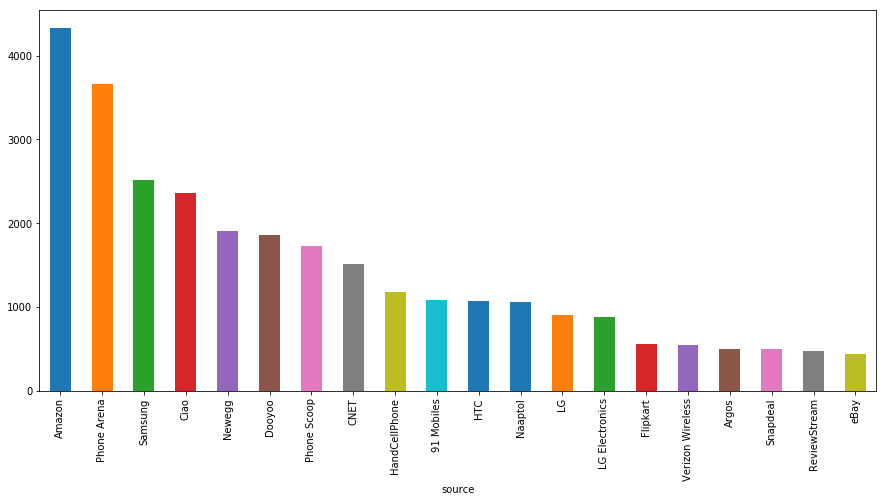

In [33]:
plt.subplots(figsize=(15,7))
df_average_score_by_source.groupby(['source'])['count_per_source'].count().sort_values(ascending=False).head(20).plot(kind='bar')

In [34]:
Amazon = df_average_score_by_source[df_average_score_by_source['source']=='Amazon']
Amazon['date'] = pd.to_datetime(Amazon['date'])
Amazon = Amazon.sort_values(by='date')
Amazon

,source,date,score,count_per_source
3913,Amazon,2005-04-02,10.000000,4327
3838,Amazon,2005-04-12,10.000000,4327
4449,Amazon,2005-06-17,10.000000,4327
5245,Amazon,2005-09-13,10.000000,4327
5341,Amazon,2005-09-23,10.000000,4327
1871,Amazon,2005-11-25,10.000000,4327
1893,Amazon,2005-11-27,10.000000,4327
2251,Amazon,2005-12-07,10.000000,4327
2740,Amazon,2006-02-19,8.000000,4327
4595,Amazon,2006-06-04,10.000000,4327


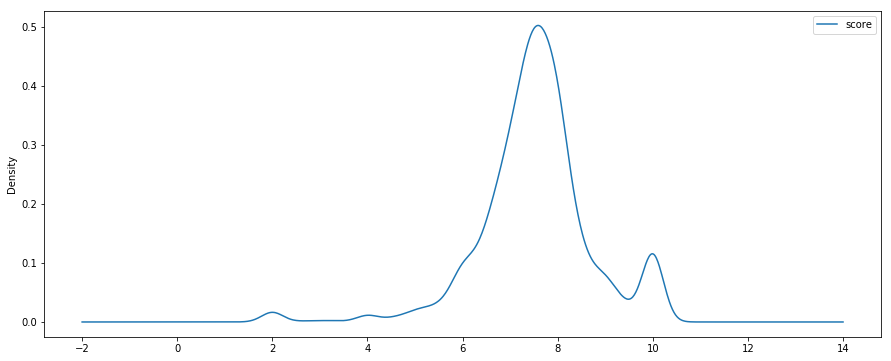

In [35]:
Amazon['score'].plot.kde(x='date',y='score',legend=True,figsize=(15,6))
#Kde plot to make sense of large values to be plotted

# Y will represent actual values in the data.
# X axis of a KDE plot is the range of values in the data set. See values between 2 and 10 only to make sense of the graph

In [36]:
ma_day=[10,20,50]

for ma in ma_day:
    column_name='MA for %s days' %(str(ma))
    Amazon[column_name]=Amazon['score'].rolling(ma).mean()

In [37]:
Amazon

,source,date,score,count_per_source,MA for 10 days,MA for 20 days,MA for 50 days
3913,Amazon,2005-04-02,10.000000,4327,NaN,NaN,NaN
3838,Amazon,2005-04-12,10.000000,4327,NaN,NaN,NaN
4449,Amazon,2005-06-17,10.000000,4327,NaN,NaN,NaN
5245,Amazon,2005-09-13,10.000000,4327,NaN,NaN,NaN
5341,Amazon,2005-09-23,10.000000,4327,NaN,NaN,NaN
1871,Amazon,2005-11-25,10.000000,4327,NaN,NaN,NaN
1893,Amazon,2005-11-27,10.000000,4327,NaN,NaN,NaN
2251,Amazon,2005-12-07,10.000000,4327,NaN,NaN,NaN
2740,Amazon,2006-02-19,8.000000,4327,NaN,NaN,NaN
4595,Amazon,2006-06-04,10.000000,4327,9.800000,NaN,NaN


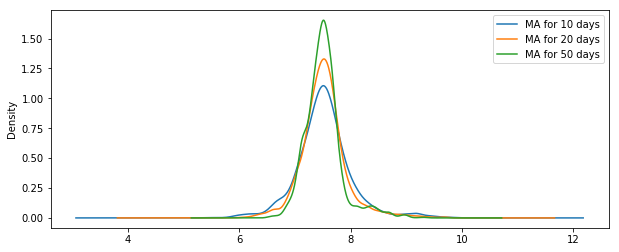

In [38]:
Amazon['MA for 10 days'].plot(kind='kde',legend=True,figsize=(10,4))
Amazon['MA for 20 days'].plot(kind='kde',legend=True,figsize=(10,4))
Amazon['MA for 50 days'].plot(kind='kde',legend=True,figsize=(10,4))

In [39]:
#Same Analysis for costco to verify results as the number is less

In [40]:
Costco = df_average_score_by_source[df_average_score_by_source['source']=='Costco']
Costco['date'] = pd.to_datetime(Costco['date'])
Costco = Costco.sort_values(by='date')

Text(0.5, 0, 'Date')

Text(0, 0.5, 'Density')

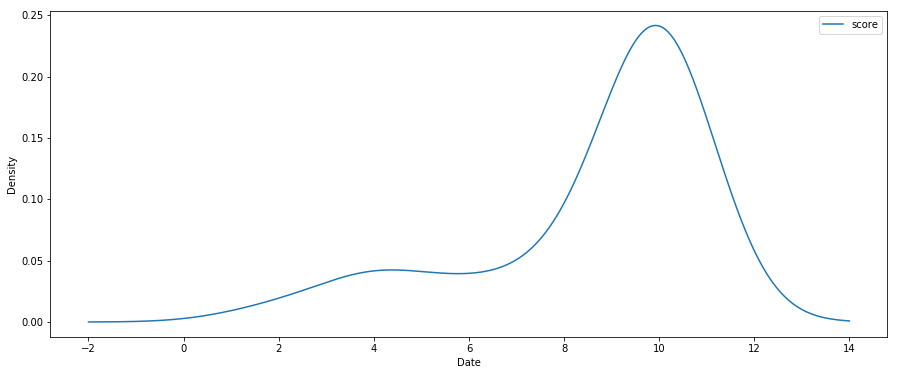

In [41]:
ax = Costco['score'].plot(kind='kde',x='date',y='score',legend=True,figsize=(15,6))
ax.set_xlabel("Date")
ax.set_ylabel("Density")
#See values between 2 and 10 only to make sense of the graph

In [42]:
ma_day=[2,5,10]

for ma in ma_day:
    column_name='MA for %s days' %(str(ma))
    Costco[column_name]=Costco['score'].rolling(ma).mean()

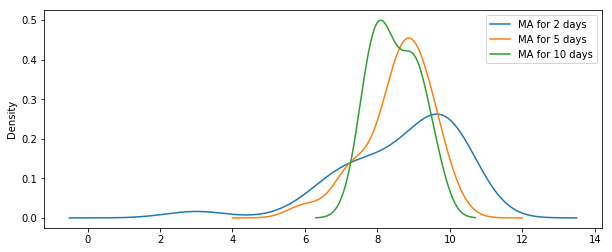

In [43]:
Costco['MA for 2 days'].plot(kind='kde',legend=True,figsize=(10,4))
Costco['MA for 5 days'].plot(kind='kde',legend=True,figsize=(10,4))
Costco['MA for 10 days'].plot(kind='kde',legend=True,figsize=(10,4))

In [44]:
# Results of KDE and M.A are good and similar

In [45]:
# Method to sort grouped values and then get max or min
# 1.Group the data, reset index to get dataframe, sort values explicitly and select first or last function
# 2.Group the data, reset index to get dataframe, use max or min function to select within groups

In [46]:
country_source_of_buy = En_Reviews.groupby(['country','source'])['score'].count().reset_index()
country_source_of_buy = country_source_of_buy.sort_values(by='score', ascending=False)
country_source_of_buy.groupby('country')['score'].first()

country
au       539
ca      7747
gb     61673
in    112620
nz        66
sg        10
us    203735
za        23
Name: score, dtype: int64

In [47]:
country_source_of_buy.groupby('country')['score'].max()

country
au       539
ca      7747
gb     61673
in    112620
nz        66
sg        10
us    203735
za        23
Name: score, dtype: int64

In [48]:
# We will now work on textual analysis
# Till now we had the rating but we didn't knew the user's reason for the rating, we will find top reasons for the rating
# Preprocessing is used to scale the values between 0 and 1, afterall its linear algebra, it reduces the scale to make problem easier

In [49]:
# takes a list of comment strings and tokenizes
def tokenize_no_SW(text2):
    new=[]
    tokens=[]
    count=0
    for text in text2:
        pattern=r'\w[\w\'-]*\w'      
        tokens=nltk.regexp_tokenize(text, pattern)
        tokens=[tokens.lower() for tokens in tokens]
        tokens_without_sw = [word for word in tokens if not word in stopwords.words()]
        new+=tokens_without_sw
        count+=1
    return new

#returns most common n words
def mostcommon(listname,n,no_stopword=False):
    stop_words = nltk.corpus.stopwords.words('english')
    final=[]
    if no_stopword==True:
        for i in listname:
            if i not in stop_words:
                final.append(i)
    else:
        final=listname
    com=nltk.FreqDist(final)
    x=com.most_common(n)
    return x

In [50]:
result=En_Reviews['extract']
result=list(map(str, result))

In [58]:
#only first 100 text to save time
result=tokenize_no_SW(result[:100])

In [59]:
print(mostcommon(result,5))

[('phone', 85), ('great', 31), ('screen', 28), ('s8', 24), ('samsung', 22)]
